In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
#import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\bayar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('GBPUSD_M30.csv')

In [3]:
df.head(5)

,Unnamed: 0,Date,Open,Close,High,Low,Volume
0,0,1999-02-12 23:00:00,1.6348,1.6350,1.6347,1.6352,12
1,1,1999-02-12 23:30:00,1.6349,1.6350,1.6349,1.6350,2
2,2,1999-02-15 00:00:00,1.6345,1.6313,1.6313,1.6345,17
3,3,1999-02-15 00:30:00,1.6318,1.6321,1.6318,1.6321,2
4,4,1999-02-15 01:00:00,1.6320,1.6325,1.6317,1.6325,13


In [4]:
df.shape

(257600, 7)

In [5]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date']
pd.to_datetime(df.time[2], unit='s')
#datetime.fromtimestamp(1591397966).isoformat()

AttributeError: 'DataFrame' object has no attribute 'time'

<function matplotlib.pyplot.show(close=None, block=None)>

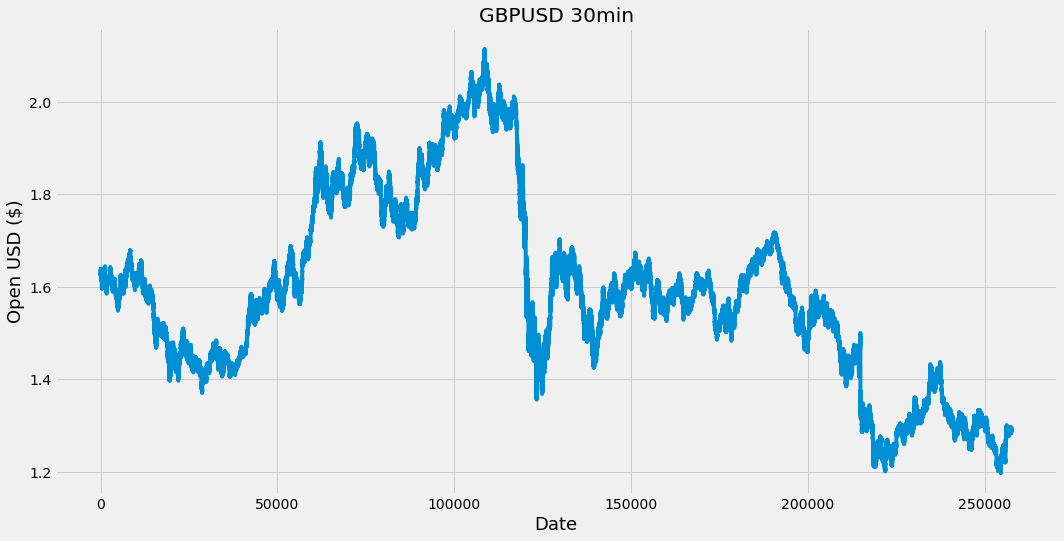

In [6]:
plt.figure(figsize=(16,8))
plt.title('GBPUSD 30min')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open USD ($)', fontsize=18)
plt.show

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
x=df['Date']
y=df['High']
y1=df['Low']
ax2 = ax1.twinx()
ax1.plot(x, y, 'g-', linewidth=1)
ax2.plot(x, y1, 'b-', linewidth=1)

ax1.set_xlabel('Date')
ax1.set_ylabel('High', color='g')
ax2.set_ylabel('Low', color='b')

plt.show()

In [16]:
data =df.filter(['Open'])

In [18]:
dataset = data.values

In [25]:
training_data_len = math.ceil( len(dataset) * .8 )

In [26]:
training_data_len 

206080

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [28]:
#scaled_data
dataset

array([[0.47736787],
       [0.47747689],
       [0.47704082],
       ...,
       [0.1049843 ],
       [0.10513693],
       [0.10547488]])

In [29]:
train_data = dataset[0:training_data_len , :]

In [30]:
x_train =[]
y_train =[]

In [31]:
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [32]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train =np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(206050, 30, 1)

In [34]:
model = Sequential()
model.add(LSTM(10, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(10, return_sequences = False))
model.add(Dense(5))
model.add(Dense(1))

In [35]:
#model.compile(optimizer='adam', loss = 'mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = 5, epochs = 1)